In [13]:
%matplotlib inline
from matplotlib import pyplot as plt, ticker
import numpy as np

import pandas as pd

import random
import math

def pdf(n):
    return [(x, math.sqrt(1 - x ** 2)) for x in range(n) for x in [x / n]]

def dist(n):
    xs = []
    for _ in range(n):
        t = random.random()
        xs.append((math.cos(math.asin(t)), t * random.random()))
    return xs

<AxesSubplot:xlabel='x', ylabel='y'>

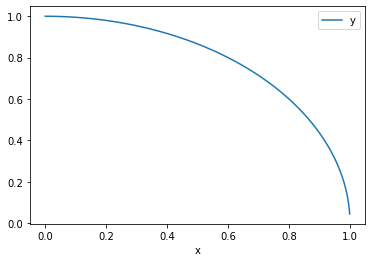

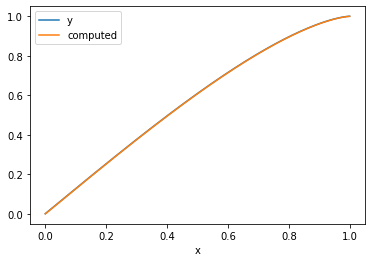

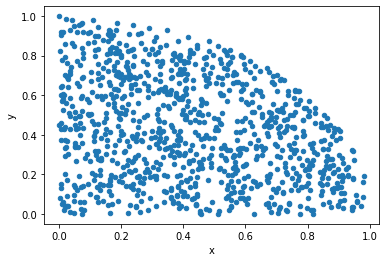

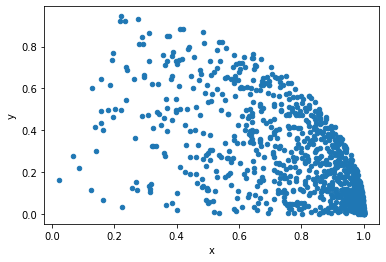

In [36]:
n = 1000
dx = 1 / n
p = pd.DataFrame(pdf(1000), columns=['x', 'y'])

c = pd.DataFrame({'x': p['x'], 'y': p['y'].cumsum() * dx * 4 / math.pi,
                  # computed based on the integral of (sqrt(1-x**2) dx)
                  'computed': p['x'].apply(lambda x: 0.5*(math.asin(x) + x * math.sqrt(1 - x*x))) * 4 / math.pi})

def rev(cdf, n):
    xs = []
    for _ in range(n):
        t = random.random()
        x = cdf['x'].iloc[cdf['y'].searchsorted(t)]
        y = math.sin(math.acos(x)) * random.random()
        xs.append((x, y))
    return xs

def rev_pdf(n):
    xs = []
    for _ in range(n):
        t = random.random()
        x = math.sqrt(1 - t * t)
        y = math.sin(math.acos(x)) * random.random()
        xs.append((x, y))
    return xs

p.plot(x = 'x', y = 'y')
c.plot(x = 'x')

df = pd.DataFrame(rev(c, 1000), columns=['x', 'y'])
df.plot.scatter(0, 1)

df = pd.DataFrame(rev_pdf(1000), columns=['x', 'y'])
df.plot.scatter(0, 1)

In [52]:
p = 0.471

def poisson_mu(p):
    r = p
    p = 1 - p
    s = r
    k = 1
    r1 = 1
    ss = r
    while r < r1:
        r1 = r
        k += 1
        r *= p
        s += k * r
        ss += k * k * r
    print(k, r)
    return s, ss
mu, sq = poisson_mu(p)
print(mu, math.sqrt(sq - mu * mu))

mu, sq = poisson_mu(0.3)
print(mu, math.sqrt(sq - mu * mu))

1170 5e-324
2.123142250530786 1.544212020889017
2084 5e-324
3.3333333333333326 2.788866755113585


5-15
----

A coin is tossed 10 times, giving 2 tails and 8 heads. How fair is it?

In [59]:
def C(n, m):
    # C(n, m) = n! / (m! * (n - m)!)
    num = m
    d = 1
    p = 1
    while num < n:
        num += 1
        p *= num
        p /= d
        d += 1
    return p

print('The probability that a fair coin produced this:', C(10, 8) * (1/2) ** 10)

The probability that a fair coin produced this: 0.0439453125


5-18
----

A = all three say "it is raining"

B = it is actually raining

P(A|B) = (2/3)^3

P(A|-B) = (1/3)^3

P(A|B) \* P(B) = P(B|A) \* P(A)

P(B|A) = P(A|B) \* P(B) / P(A)

P(A) = P(A|B) \* P(B) + P(A|-B) \* (1 - P(B))
     = (P(A|B) - P(A|-B)) \* P(B) + P(A|-B)

P(B|A) = 8/27 \* P(B) / ((8/27 - 1/27) \* P(B) + 1/27)
       = 8 / (7 + 1 / P(B))